In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
try:
    data = pd.read_csv('/datasets/hypotheses_us.csv',sep=';')
    orderss = pd.read_csv('/datasets/orders_us.csv')
    visits = pd.read_csv('/datasets/visits_us.csv')
except:
    data = pd.read_csv('/Users/adiel/Downloads/hypotheses_us.csv',sep=';')
    orderss = pd.read_csv('/Users/adiel/Downloads/orders_us.csv')
    visits = pd.read_csv('/Users/adiel/Downloads/visits_us.csv')

In [3]:
data = data.rename(columns=str.lower)
data.head()

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
pd.set_option("max_colwidth",150)
data.head()

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1


In [6]:
data['ice'] = (data['impact'] * data['confidence'] / data['effort'])
data[['hypothesis','ice']].sort_values(by='ice', ascending=False)

,hypothesis,ice
8,Launch a promotion that gives users discounts on their birthdays,16.200000
0,Add two new channels for attracting traffic. This will bring 30% more users,13.333333
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.200000
6,Show banners with current offers and sales on the main page. This will boost conversion,8.000000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.000000
1,Launch your own delivery service. This will shorten delivery time,2.000000
5,Add a customer review page. This will increase the number of orders,1.333333
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.125000
4,Change the background color on the main page. This will increase user engagement,1.000000


In [7]:
data['rice'] = (data['impact'] * data['reach']*data['confidence']/ data['effort'])
data[['hypothesis','rice']].sort_values(by='rice', ascending=False).head()

,hypothesis,rice
7,Add a subscription form to all the main pages. This will help you compile a mailing list,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,40.0
8,Launch a promotion that gives users discounts on their birthdays,16.2


In [8]:
data[['hypothesis','ice','rice']].sort_values(by=['rice','ice'], ascending=False)

,hypothesis,ice,rice
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.200000,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.000000,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,13.333333,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,8.000000,40.0
8,Launch a promotion that gives users discounts on their birthdays,16.200000,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.125000,9.0
1,Launch your own delivery service. This will shorten delivery time,2.000000,4.0
5,Add a customer review page. This will increase the number of orders,1.333333,4.0
4,Change the background color on the main page. This will increase user engagement,1.000000,3.0


In [9]:
orderss

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [10]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [11]:
orderss['date'] = orderss['date'].map( lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visits['date'] = visits['date'].map( lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [12]:
orderss.describe()

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1197.000000
mean,2.155621e+09,2.165960e+09,131.491646
std,1.229085e+09,1.236014e+09,603.004729
min,1.062393e+06,5.114589e+06,5.000000
25%,1.166776e+09,1.111826e+09,20.800000
50%,2.145194e+09,2.217985e+09,50.200000
75%,3.237740e+09,3.177606e+09,130.400000
max,4.293856e+09,4.283872e+09,19920.400000


In [13]:
orderss.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [14]:
vis_group = orderss.groupby('visitorId')['date'].min()
vis_group.name = 'first_date'
orderss = orderss.join(vis_group, on='visitorId')
orderss.head()

,transactionId,visitorId,date,revenue,group,first_date
0,3667963787,3312258926,2019-08-15,30.4,B,2019-08-15
1,2804400009,3642806036,2019-08-15,15.2,B,2019-08-15
2,2961555356,4069496402,2019-08-15,10.2,A,2019-08-12
3,3797467345,1196621759,2019-08-15,155.1,B,2019-08-15
4,2282983706,2322279887,2019-08-15,40.5,B,2019-08-15


In [15]:
ba = orderss.pivot_table(index=['visitorId'],columns='group',values='transactionId',aggfunc='count').reset_index()
ba = ba.dropna()

print(len(ba))
ba.head()

58


group,visitorId,A,B
2,8300375,1.0,1.0
44,199603092,4.0,1.0
51,232979603,1.0,1.0
55,237748145,4.0,1.0
66,276558944,1.0,1.0


In [16]:
user = list(ba['visitorId'])
orders = orderss[orderss.visitorId.isin(user) == False]
orders.head(2)

,transactionId,visitorId,date,revenue,group,first_date
0,3667963787,3312258926,2019-08-15,30.4,B,2019-08-15
1,2804400009,3642806036,2019-08-15,15.2,B,2019-08-15


In [17]:
print('visitors num after filt')
print(len(orders[orders['group']=='A']))
print(len(orders[orders['group']=='B']))
print('----------------------------')
print('visitors num before filt')
print(len(orderss[orderss['group']=='A']))
print(len(orderss[orderss['group']=='B']))

visitors num after filt
468
548
----------------------------
visitors num before filt
557
640


In [18]:
print(orders['date'].min())
print(orders['date'].max())

2019-08-01 00:00:00
2019-08-31 00:00:00


In [19]:
d_groups = orders[['date','group']].drop_duplicates()
order_table = d_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [20]:
visits_table = d_groups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])
visits_table

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
533,2019-08-29,B,17708
757,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [21]:
g_data= order_table.merge(visits_table, left_on=['date', 'group'], right_on=['date', 'group'])

In [22]:
g_data.columns = ['date', 'group', 'order_c', 'buyer_c', 'revenue_sum', 'visitors']
g_data.head()

,date,group,order_c,buyer_c,revenue_sum,visitors
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845


In [23]:
group_a = g_data[g_data['group']=='A'][['date','revenue_sum', 'order_c']]
group_a.head()

,date,revenue_sum,order_c
0,2019-08-01,2266.6,23
2,2019-08-02,3734.9,42
4,2019-08-03,5550.1,66
6,2019-08-04,6225.6,77
8,2019-08-05,7623.6,99


In [24]:
group_b = g_data[g_data['group']=='B'][['date','revenue_sum', 'order_c']]
group_b.head()

,date,revenue_sum,order_c
1,2019-08-01,967.2,17
3,2019-08-02,3535.3,40
5,2019-08-03,4606.9,54
7,2019-08-04,6138.5,68
9,2019-08-05,7587.8,89


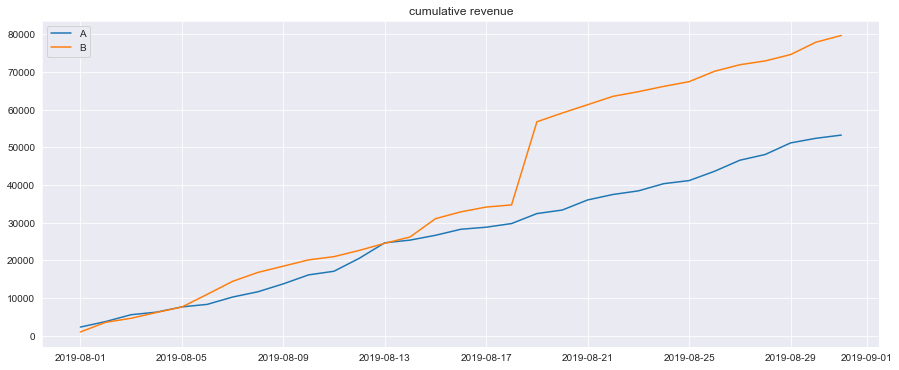

In [25]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,6))
plt.plot(group_a['date'], group_a['revenue_sum'], label='A')
plt.plot(group_b['date'], group_b['revenue_sum'], label='B')
plt.title('cumulative revenue')
plt.legend();

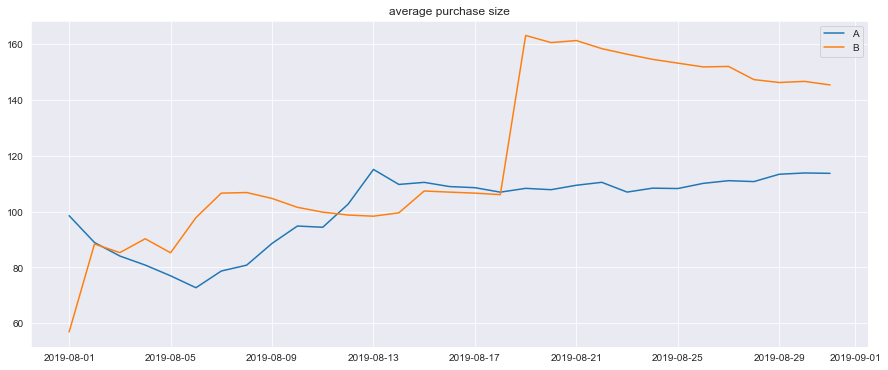

In [26]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,6))
plt.plot(group_a['date'], group_a['revenue_sum']/group_a['order_c'], label='A')
plt.plot(group_b['date'], group_b['revenue_sum']/group_b['order_c'], label='B')
plt.title('average purchase size')
plt.legend() 


In [27]:
merge_group = group_a.merge(group_b, left_on='date', right_on='date', how='left', suffixes=['a', 'b'])
merge_group.head()

,date,revenue_suma,order_ca,revenue_sumb,order_cb
0,2019-08-01,2266.6,23,967.2,17
1,2019-08-02,3734.9,42,3535.3,40
2,2019-08-03,5550.1,66,4606.9,54
3,2019-08-04,6225.6,77,6138.5,68
4,2019-08-05,7623.6,99,7587.8,89


Text(0.5, 1.0, 'average difference')

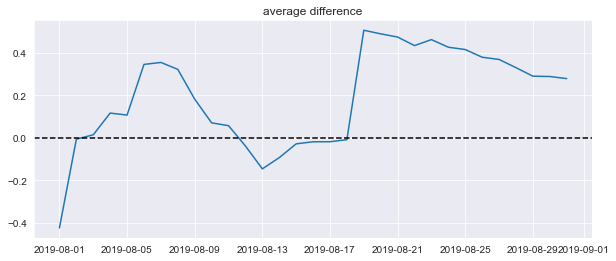

In [28]:
plt.figure(figsize=(10,4))
plt.plot(merge_group['date'], (merge_group['revenue_sumb']/merge_group['order_cb'])/(merge_group['revenue_suma']/merge_group['order_ca'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('average difference')

In [29]:
g_data['conversion'] = g_data['order_c']/g_data['visitors']
g_data.head()

,date,group,order_c,buyer_c,revenue_sum,visitors,conversion
0,2019-08-01,A,23,19,2266.6,719,0.031989
1,2019-08-01,B,17,17,967.2,713,0.023843
2,2019-08-02,A,42,36,3734.9,1338,0.031390
3,2019-08-02,B,40,39,3535.3,1294,0.030912
4,2019-08-03,A,66,60,5550.1,1845,0.035772


In [30]:
g_data['conversion'].mean()

0.028076612168412958

In [31]:
print(g_data['date'].min())
print(g_data['date'].max())

2019-08-01 00:00:00
2019-08-31 00:00:00


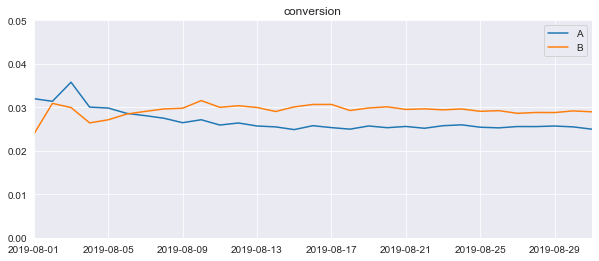

In [32]:
g_dataA = g_data[g_data['group']=='A']
g_dataB = g_data[g_data['group']=='B']
plt.figure(figsize=(10,4))
plt.plot(g_dataA['date'], g_dataA['conversion'], label='A')
plt.plot(g_dataB['date'], g_dataB['conversion'], label='B')
plt.legend()
plt.title('conversion')
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-08-31'), 0, 0.05]);

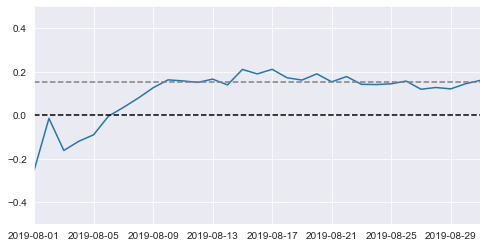

In [33]:
mergex = g_dataA[['date','conversion']].merge(g_dataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(8,4))
plt.plot(mergex['date'], mergex['conversionB']/mergex['conversionA']-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-08-31'), -0.5, 0.5]);

In [34]:
orders.head()

,transactionId,visitorId,date,revenue,group,first_date
0,3667963787,3312258926,2019-08-15,30.4,B,2019-08-15
1,2804400009,3642806036,2019-08-15,15.2,B,2019-08-15
3,3797467345,1196621759,2019-08-15,155.1,B,2019-08-15
4,2282983706,2322279887,2019-08-15,40.5,B,2019-08-15
5,182168103,935554773,2019-08-15,35.0,B,2019-08-15


In [35]:
users_g = (orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}))
users_g.columns = ['userId', 'orders']
users_g.sort_values(by='orders', ascending=False).head(10) 

,userId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


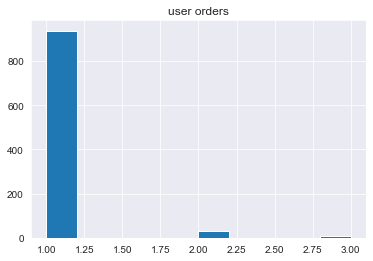

In [36]:
plt.hist(users_g['orders']);
plt.title('user orders');

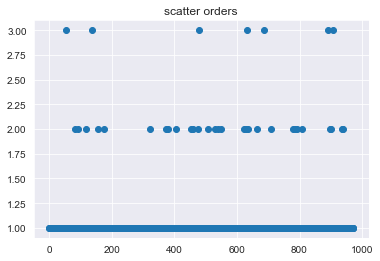

In [37]:
value = pd.Series(range(0,len(users_g)))
plt.scatter(value, users_g['orders']) 
plt.title('scatter orders');

In [38]:
np.percentile(users_g['orders'], [95, 99])

array([1., 2.])

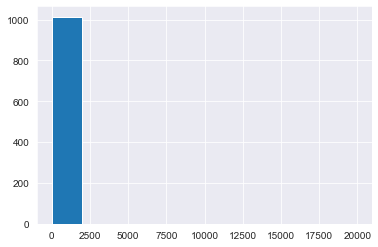

In [39]:
plt.hist(orders['revenue']);

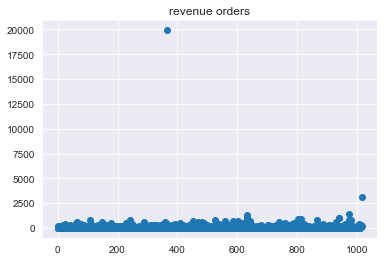

In [40]:
valuex = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(valuex, orders['revenue']) 
plt.title('revenue orders');

In [41]:
np.percentile(orders['revenue'], [95, 99])

array([414.275, 830.3  ])

In [42]:
UsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
UsersA.columns = ['user', 'orders']

UsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
UsersB.columns = ['user', 'orders']
UsersA.head()

,user,orders
0,11685486,1
1,54447517,1
2,66685450,1
3,78758296,1
4,85103373,1


In [43]:
sampleA = pd.concat([UsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(UsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([UsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(UsersB['orders'])), name='orders')],axis=0)

In [44]:
print('p-value:',"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('relative gain:',"{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

p-value: 0.011
relative gain: 0.160


In [45]:
print('revenue p-value:','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('revenue relative gain:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

revenue p-value: 0.862
revenue relative gain: 0.278


In [46]:
user_o = pd.concat([UsersA[UsersA['orders'] > 2]['user'], UsersB[UsersB['orders'] > 2]['user']], axis = 0)
user_re = orders[orders['revenue'] > 800]['visitorId']
cut_users = pd.concat([user_o, user_re], axis = 0).drop_duplicates().sort_values()
print(cut_users.head(5))
print(len(cut_users)) 


1099    148427295
33      249864742
58      611059232
1137    759473111
949     887908475
dtype: int64
22


In [47]:
sampleAfilt = pd.concat([UsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(UsersA['orders'])), name='orders')],axis=0)
sampleBfilt = pd.concat([UsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(UsersB['orders'])), name='orders')],axis=0)

In [48]:
sampleAfilt = pd.concat([UsersA[np.logical_not(UsersA['user'].isin(cut_users))]['orders'],pd.Series(0,index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(UsersA['orders'])), name='orders')],axis=0) 
sampleBfilt = pd.concat([UsersB[np.logical_not(UsersB['user'].isin(cut_users))]['orders'],pd.Series(0,index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(UsersB['orders'])), name='orders')],axis=0)

In [49]:
print('filt p-value:',"{0:.3f}".format(stats.mannwhitneyu(sampleAfilt, sampleBfilt)[1]))
print('filt relative gain:',"{0:.3f}".format(sampleBfilt.mean()/sampleAfilt.mean()-1)) 

filt p-value: 0.006
filt relative gain: 0.198


In [50]:
revA=orders[np.logical_and(orders['group']=='A',np.logical_not(orders['visitorId'].isin(cut_users)))]['revenue']
revB=orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(cut_users)))]['revenue']       

In [51]:
print('filt revenue p-value:',"{0:.3f}".format(stats.mannwhitneyu(revA, revB)[1]))
print('filt revenue relative gain:',"{0:.3f}".format(revB.mean()/revA.mean()-1)) 

filt revenue p-value: 0.975
filt revenue relative gain: 0.010


# final conclusion: A\B TEST

- after opening the data i looked for user who placed orders in  both groups because it could be detrimental to the test I drop   them and checked that their rate was maintained
- To conduct the test I found the p-value and the ratio beetwen the conversion rate and the revanue and my  conclusion are:

- There is a statistically significant difference in conversion between the groups, according to both the raw and the filtered     data we reject the null hypothesis and the difference is between 16%-20% in favor of group B

- The raw and the filtered data didn't show a statistically  difference between the groups in terms of average purchase size
  so we cant reject the null hypothesis the average purchase size is statistically similar. , 
 
- the graph of the difference in conversion between the groups shows that group B results are better than group A ,The graphs     shows growth and so does the data so I can determine that group B is  statistically preferable 

- so we should stop the test, consider  group B as the leader